# Heart Disease Analysis

The purpose of this project is to analyze a large dataset of individuals with heart disease and explore the factors that may contribute to it. Data pulled from the following link:

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

### Code chunks below just perform some of the requisite tasks of installing some dependancies, and import some libraries.

In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=0287d6d521a5b3a58954c4aa9b8a8f625b304f6676cca05fe93d6bda8f989d6f
  Stored in directory: c:\users\deoli\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from matplotlib.pyplot import figure

### Importing dataset from a csv file and checking how the data is ordered.
Original dataframe: "hd_df"

In [4]:
hd_df = pd.read_csv('heart_2020_cleaned.csv')

In [5]:
hd_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Checking for missing or null values
We have a clean dataset with no missing or null values.

In [6]:
hd_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
hd_df.isnull().values.any()

False

### Basic information on the size of the dataset
319,795 records and 18 variables

In [8]:
row_num = hd_df.shape[0]
col_num = hd_df.shape[1]

print(row_num)
print(col_num)

319795
18


### Data types for each column

In [9]:
hd_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### Barplots for BMI, Sleep Time
We can see a lot of outliers in this dataset.

<AxesSubplot:xlabel='BMI'>

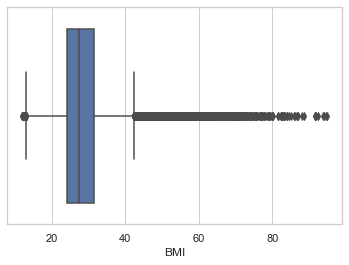

In [10]:
sns.set_theme(style="whitegrid")
sns.boxplot(data = hd_df, x = 'BMI')

<AxesSubplot:xlabel='SleepTime'>

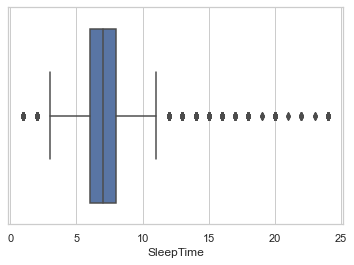

In [11]:
sns.boxplot(data = hd_df, x = 'SleepTime')

# Sample from dataframe

In [12]:
sample_hd_df = hd_df.sample(n=1000)

### Vizualizing BMI outliers using 3sigma rule and IQR
3sigma = red line

IQR = green line

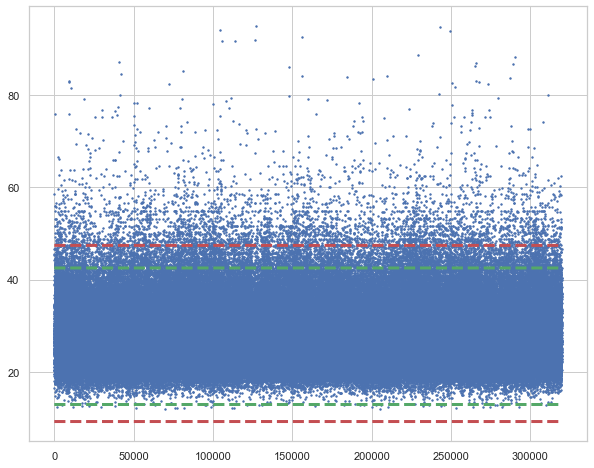

In [13]:
x1 = np.arange(len(hd_df))
y1 = hd_df['BMI']

figure(figsize=(10,8))

y1_u, y1_l = np.quantile(y1,[0.75,0.25]) #Computing sequence of quantiles and assigning to variables
Q = y1_u - y1_l #Inter quantile is upper q minus lower q

plt.plot(x1, y1.mean() - 3*y1.std() + x1*0, '--', linewidth = 3, c='r') #Plotting lines of lower 3sig
plt.plot(x1, y1.mean() + 3*y1.std() + x1*0, '--', linewidth = 3, c='r') #Plotting lines of upper 3sig

plt.plot(x1, y1_l - 1.5*Q + x1*0, '--', linewidth = 3, c = 'g')
plt.plot(x1, y1_u + 1.5*Q + x1*0, '--', linewidth = 3, c = 'g')

#figure(figsize=(8,6), dpi=80)
plt.scatter(x1, y1, s=2)

### BMI outliers bounds with 3sigma and IQR.

In [14]:
bmi_3s_ub = y1.mean() + 3*y1.std()
bmi_3s_lb = y1.mean() - 3*y1.std()
bmi_iqr_ub = y1_u + 1.5*Q
bmi_iqr_lb = y1_l - 1.5*Q


print("BMI 3 sigma upper bound: ", bmi_3s_ub)
print("BMI 3 sigma lower bound: ", bmi_3s_lb)
print("BMI IQR upper bound: ", bmi_iqr_ub)
print("BMI IQR lower bound: ", bmi_iqr_lb) 

BMI 3 sigma upper bound:  47.393699122340884
BMI 3 sigma lower bound:  9.257097919511772
BMI IQR upper bound:  42.505
BMI IQR lower bound:  12.945


### Vizualizing sleep time outliers using 3sigma rule and IQR
3sigma = red line

IQR = green line

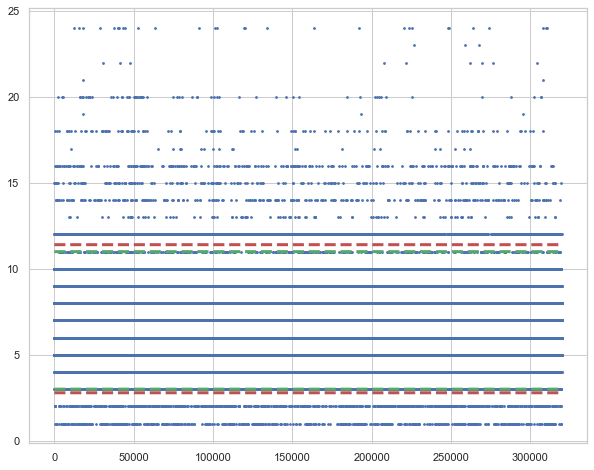

In [15]:
x2 = np.arange(len(hd_df))
y2 = hd_df['SleepTime']

figure(figsize=(10,8))

y2_u, y2_l = np.quantile(y2,[0.75,0.25]) #Computing sequence of quantiles and assigning to variables
Q2 = y2_u - y2_l #Inter quantile is upper q minus lower q

plt.plot(x2, y2.mean() - 3*y2.std() + x2*0, '--', linewidth = 3, c='r') #Plotting lines of lower 3sig
plt.plot(x2, y2.mean() + 3*y2.std() + x2*0, '--', linewidth = 3, c='r') #Plotting lines of upper 3sig

plt.plot(x2, y2_l - 1.5*Q2 + x2*0, '--', linewidth = 3, c = 'g')
plt.plot(x2, y2_u + 1.5*Q2 + x2*0, '--', linewidth = 3, c = 'g')

#figure(figsize=(8,6), dpi=80)
plt.scatter(x2, y2, s=3)

### Sleep time outliers bounds with 3sigma and IQR

In [16]:
st_3s_ub = y2.mean() + 3*y2.std()
st_3s_lb = y2.mean() - 3*y2.std()
st_iqr_ub = y2_u + 1.5*Q2
st_iqr_lb = y2_l - 1.5*Q2


print("Sleep time 3 sigma upper bound: ", st_3s_ub)
print("Sleep time 3 sigma lower bound: ", st_3s_lb)
print("Sleep time IQR upper bound: ", st_iqr_ub)
print("Sleep time IQR lower bound: ", st_iqr_lb) 

Sleep time 3 sigma upper bound:  11.405095871372932
Sleep time 3 sigma lower bound:  2.7890535055716725
Sleep time IQR upper bound:  11.0
Sleep time IQR lower bound:  3.0


### Removing outliers
We will remove BMI and Sleep Time outliers using IQR. Sleep time trimming will include the bounds, since sleep time falls on even increments. New dataset is "hd_df_trim"

In [17]:
hd_df_trim = hd_df[(hd_df['BMI'] > bmi_iqr_lb) & (hd_df['BMI'] < bmi_iqr_ub) & (hd_df['SleepTime'] > st_iqr_lb) & (hd_df['SleepTime'] < st_iqr_ub)]


Difference between trimmed and original

In [18]:
print("Trimmed dataset: ", hd_df_trim.shape[0])
print("Original dataset: ", hd_df.shape[0])

Trimmed dataset:  302862
Original dataset:  319795


Below we see the BMI mean value reduce from 28.33 to 27.66 with the standard deviation moving from 6.36 to 5.20. The sleep time mean stays nearly the same with the standard deviation reducing from 1.44 to 1.83 

In [19]:
hd_df_trim.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,302862.000000,302862.000000,302862.000000,302862.000000
mean,27.659311,3.111031,3.695627,7.088374
std,5.204357,7.618183,7.712444,1.183403
min,12.970000,0.000000,0.000000,4.000000
25%,23.810000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,30.900000,1.000000,3.000000,8.000000
max,42.500000,30.000000,30.000000,10.000000


In [20]:
hd_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 1) What is the BMI distribution on our trimmed dataset?
Red lines specifies underweight, normal weight, overweight, and obese from left to right. Below we see that our dataset leans to the overweight and obese BMI categories together nearly comprising 67% of our dataset.

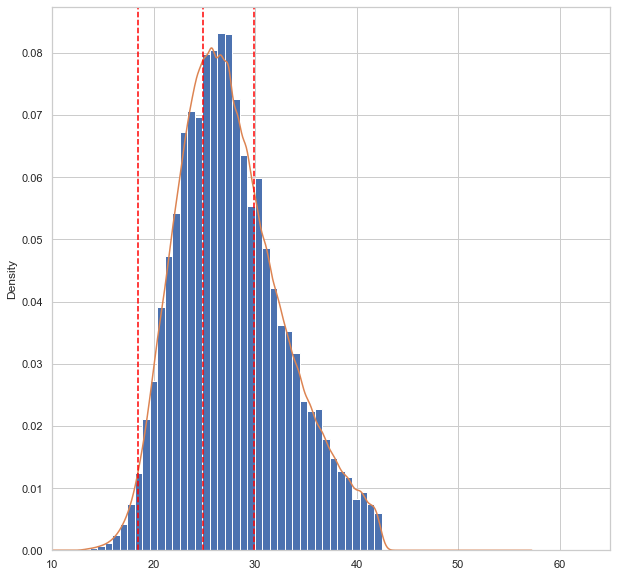

In [21]:
plt2 = hd_df_trim['BMI'].plot.hist(density=True,
                              bins=40,
                              xlim = [10,65],
                              figsize = (10,10),
                              grid = True)

plt2 = hd_df_trim['BMI'].plot(kind = 'kde')
plt2.axvline(18.5, color = "red", linestyle = "--") #under weight below this value
plt2.axvline(24.9, color = "red", linestyle = "--") #over weight above this value 
plt2.axvline(29.9, color = "red", linestyle = "--") #obese above this value

### Percent of dataset within each BMI bracket from trimmed dataset

In [22]:
# Percentage underweight
row_num = hd_df_trim.shape[0]

under_count = hd_df_trim[hd_df['BMI'] < 18.5].BMI.count()
under_per = hd_df_trim[hd_df['BMI'] < 18.5].BMI.count() / row_num * 100

# Percentage healthy BMI
healthy_count = hd_df_trim.loc[(hd_df_trim['BMI'] >= 18.5) & (hd_df_trim['BMI'] < 25)].BMI.count()
healthy_per = hd_df_trim.loc[(hd_df_trim['BMI'] >= 18.5) & (hd_df_trim['BMI'] < 25)].BMI.count() / row_num * 100

# Percentage overweight
over_count = hd_df_trim.loc[(hd_df['BMI'] >= 25) & (hd_df_trim['BMI'] < 30)].BMI.count()
over_per = hd_df_trim.loc[(hd_df['BMI'] >= 25) & (hd_df_trim['BMI'] < 30)].BMI.count() / row_num * 100

# Percentage obese
obese_count = hd_df_trim[hd_df_trim['BMI'] >= 30].BMI.count()
obese_per = hd_df_trim[hd_df_trim['BMI'] >= 30].BMI.count() / row_num * 100

#healthyw_per = hd_df[hd_df['BMI'] >= 18.5 & hd_df['BMI'] <= 24.9].BMI.count() / row_num * 100
print("Under BMI %: ", under_per)
print("Healthy BMI %: ", healthy_per)
print("Over BMI %: ", over_per)
print("Obese BMI %: ", obese_per)

<ipython-input-22-06777e925cbb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  under_count = hd_df_trim[hd_df['BMI'] < 18.5].BMI.count()
<ipython-input-22-06777e925cbb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  under_per = hd_df_trim[hd_df['BMI'] < 18.5].BMI.count() / row_num * 100


Under BMI %:  1.616908030720262
Healthy BMI %:  31.508739954170544
Over BMI %:  37.11393307843176
Obese BMI %:  29.76041893667743


(-1.1031945099738438,
 1.1128178670888662,
 -1.115820563673394,
 1.1007534004775272)

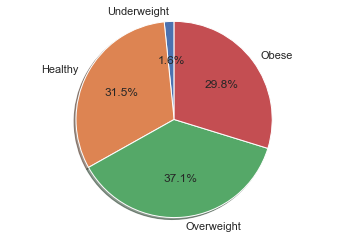

In [23]:
labels_p1 = 'Underweight', 'Healthy', 'Overweight', 'Obese'
sizes_p1 = [under_per, healthy_per, over_per, obese_per]

fig1, ax1 = plt.subplots()
ax1.pie(sizes_p1, labels=labels_p1, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

### Percent of each weight bracket that have Heart Disease from trimmed dataset

In [24]:
under_hd_per = hd_df_trim[(hd_df_trim['BMI'] < 18.5) & (hd_df_trim["HeartDisease"] == "Yes")].HeartDisease.count() / under_count  * 100

healthy_hd_per = hd_df_trim[(hd_df_trim['BMI'] >= 18.5) & (hd_df_trim['BMI'] < 25) & (hd_df_trim["HeartDisease"] == "Yes")].HeartDisease.count() / healthy_count * 100

over_hd_per = hd_df_trim[(hd_df_trim['BMI'] >= 25) & (hd_df_trim['BMI'] < 30) & (hd_df_trim["HeartDisease"] == "Yes")].HeartDisease.count() / over_count * 100

obese_hd_per = hd_df_trim[(hd_df['BMI'] >= 30) & (hd_df_trim["HeartDisease"] == "Yes")].HeartDisease.count() / obese_count * 100

print("Under BMI with heart disease: ", under_hd_per)
print("Healthy BMI with heart disease: ", healthy_hd_per)
print("Overweight BMI with heart disease: ", over_hd_per)
print("Obese BMI with heart disease: ", obese_hd_per)

Under BMI with heart disease:  7.514804982642434
Healthy BMI with heart disease:  6.316804292241271
Overweight BMI with heart disease:  8.56997971602434
Obese BMI with heart disease:  10.042936549321558


<ipython-input-24-b011a93c3f84>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  obese_hd_per = hd_df_trim[(hd_df['BMI'] >= 30) & (hd_df_trim["HeartDisease"] == "Yes")].HeartDisease.count() / obese_count * 100


### Percent within each BMI category with Heart Disease
Here we can see that you are more likely to have heart disease if you are not within a healthy BMI range.

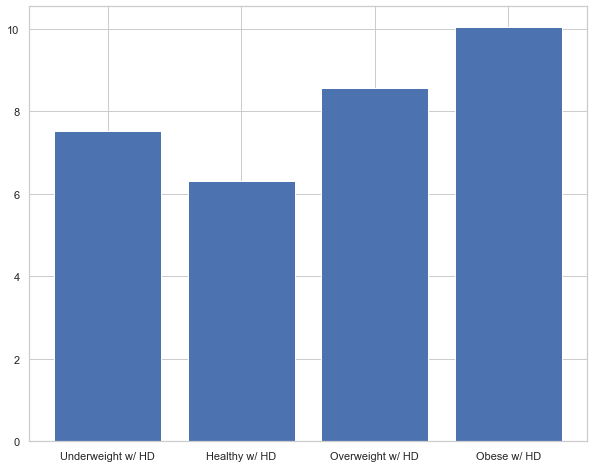

In [25]:
height_p2 = [under_hd_per, healthy_hd_per, over_hd_per, obese_hd_per]
bars_p2 = ('Underweight w/ HD', 'Healthy w/ HD', 'Overweight w/ HD', 'Obese w/ HD')
y_pos = np.arange(len(bars_p2))

figure(figsize=(10,8))

# Create bars
plt.bar(y_pos, height_p2)

# Create names on the x-axis
plt.xticks(y_pos, bars_p2)

# Show graphic
plt.show()

### 2) What is the age distribution in our dataset?
Ages are provided as ranges. Bar plot below shows that our dataset skews older.

#### Getting the age ranges in our trimmed dataset

In [26]:
age_ranges = hd_df_trim.AgeCategory.unique()

print(age_ranges)
type(age_ranges)

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']


numpy.ndarray

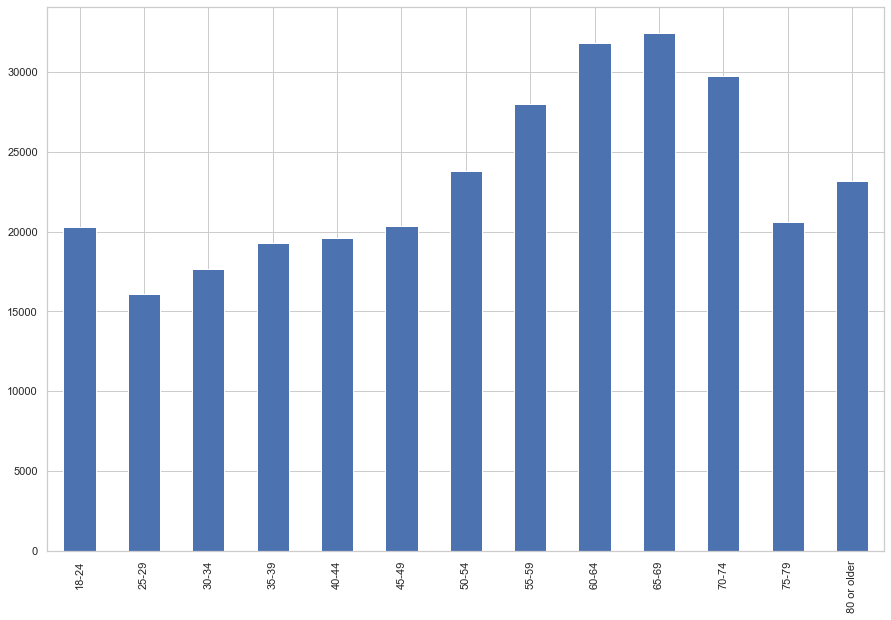

In [27]:
plt1 = hd_df_trim['AgeCategory'].value_counts().sort_index().plot(kind = 'bar',
                                                            figsize=(15,10))

### 3) How many people have heart disease in our dataset?

In [28]:
hd_num = hd_df_trim.HeartDisease.value_counts()

In [29]:
hd_df_trim.HeartDisease.value_counts()

No     277781
Yes     25081
Name: HeartDisease, dtype: int64

<AxesSubplot:ylabel='HeartDisease'>

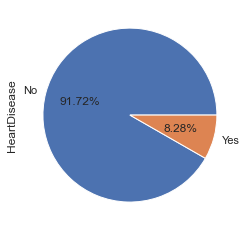

In [30]:
hd_num.plot.pie(autopct='%.2f%%')

### 4) Can we see differences in our dataset with regard to race and sex and heart disease status?
As a table it's difficult to see, but the violin plot (which combines both a boxplot and kde) demonstrates that there are differences among races and sex for BMI distribution.

In [31]:
hd_df_trim.groupby(['Race', 'Sex','HeartDisease']).describe()

BMI             \
                                                       count       mean   
Race                           Sex    HeartDisease                        
American Indian/Alaskan Native Female No              2325.0  28.687923   
                                      Yes              233.0  28.318069   
                               Male   No              1977.0  28.809525   
                                      Yes              253.0  28.954545   
Asian                          Female No              3721.0  24.352881   
                                      Yes               78.0  25.065256   
                               Male   No              3911.0  25.663327   
                                      Yes              166.0  26.585361   
Black                          Female No             11142.0  29.495496   
                                      Yes              823.0  30.177327   
                               Male   No              7978.0  28.175817   
                                      Yes              649.0  29.420955   
Hispanic                       Female No             13009.0  27.909786   
                                      Yes              626.0  29.050224   
                               Male   No             11525.0  28.146053   
                                      Yes              669.0  29.164963   
Other                          Female No              4712.0  27.560314   
                                      Yes              340.0  28.812853   
                               Male   No              4644.0  27.872039   
                                      Yes              441.0  29.194172   
White                          Female No            112642.0  27.007526   
                                      Yes             7984.0  27.975541   
                               Male   No            100195.0  27.980329   
                                      Yes            12819.0  28.746838   

                                                                             \
                                                         std    min     25%   
Race                           Sex    HeartDisease                            
American Indian/Alaskan Native Female No            5.603065  13.60  24.690   
                                      Yes           5.447600  14.62  24.550   
                               Male   No            5.279094  15.02  25.090   
                                      Yes           5.466805  12.97  25.060   
Asian                          Female No            4.463831  13.67  21.160   
                                      Yes           5.526695  16.25  20.510   
                               Male   No            4.162857  13.87  22.860   
                                      Yes           4.668898  15.50  23.535   
Black                          Female No            5.632355  13.02  25.290   
                                      Yes           5.763917  15.81  25.790   
                               Male   No            5.101796  13.56  24.410   
                                      Yes           5.301607  16.73  25.500   
Hispanic                       Female No            5.341705  13.29  23.910   
                                      Yes           5.671755  14.91  24.975   
                               Male   No            4.944300  13.02  24.800   
                                      Yes           5.032225  15.31  25.700   
Other                          Female No            5.698679  14.08  23.210   
                                      Yes           5.795634  13.95  24.560   
                               Male   No            5.089365  13.39  24.330   
                                      Yes           5.076971  15.41  25.850   
White                          Female No            5.391596  13.04  22.960   
                                      Yes           5.640785  13.44  23.780   
                               Male   No            4.79

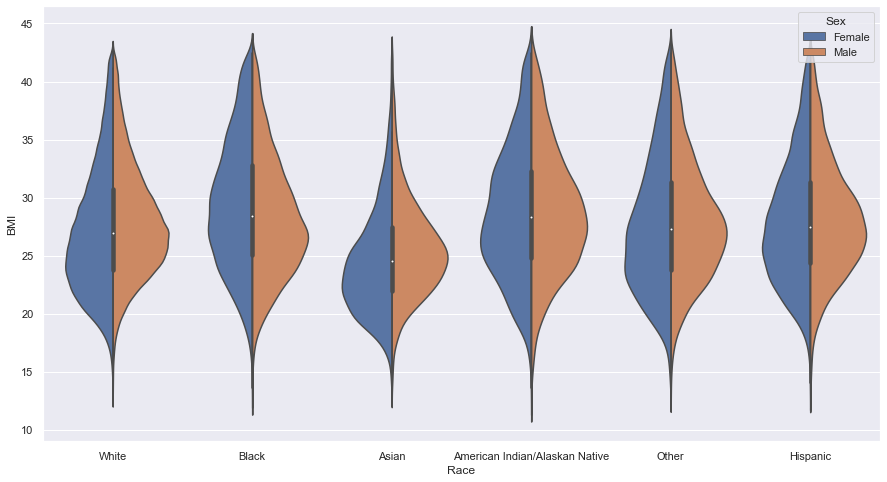

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})

b3 = sns.violinplot(data=hd_df_trim, 
                 x='Race', 
                 y='BMI',
                 hue='Sex',
                 split=True)

###Sleep time distribution

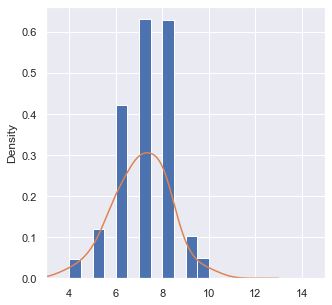

In [33]:
plt3 = hd_df_trim['SleepTime'].plot.hist(density=True,bins=12, xlim = [3,15], figsize = (5,5))
plt3 = hd_df_trim['SleepTime'].plot.kde(bw_method = 0.5)

### 5) Unwell index: Is there a relationship between how unwell someone feels and their BMI
Let's create a new metric which accounts for the time someone is either physically or mentally unwell. Values are normalized between 0-1.

Created new dataframe ("hd_df_mod1") that includes UnwellIndex


#### Scatter plot of BMI vs Unwell index
Discrete values make the plotting here difficult.

In [34]:
hd_df_mod1 = hd_df[['PhysicalHealth', 'MentalHealth']].copy() 

hd_df_mod1['UnwellIndex'] = (((hd_df_mod1['MentalHealth']) + (hd_df_mod1['PhysicalHealth'])) / 60) 

print(hd_df_mod1)

        PhysicalHealth  MentalHealth  UnwellIndex
0                  3.0          30.0     0.550000
1                  0.0           0.0     0.000000
2                 20.0          30.0     0.833333
3                  0.0           0.0     0.000000
4                 28.0           0.0     0.466667
...                ...           ...          ...
319790             7.0           0.0     0.116667
319791             0.0           0.0     0.000000
319792             0.0           0.0     0.000000
319793             0.0           0.0     0.000000
319794             0.0           0.0     0.000000

[319795 rows x 3 columns]


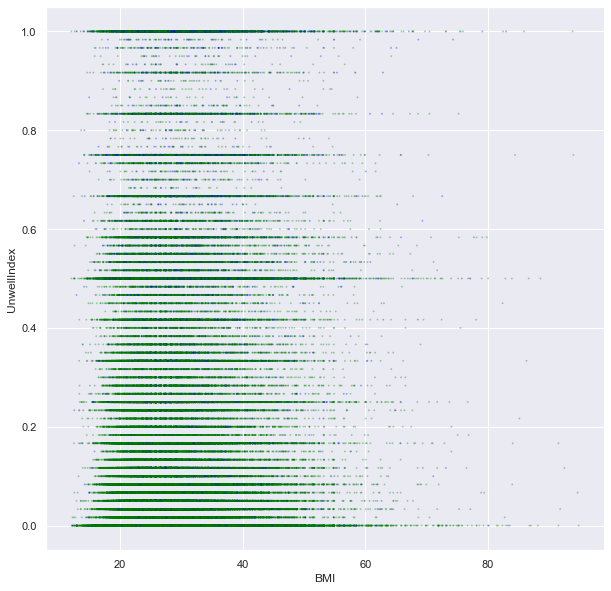

In [35]:
colors = {'Yes': 'blue', 'No':'green'}

hd_df['UnwellIndex'] = hd_df_mod1['UnwellIndex']

plt2 = hd_df.plot.scatter(x = 'BMI', 
                          y = 'UnwellIndex',
                          c = hd_df['HeartDisease'].map(colors),
                          s=1,
                          figsize = (10, 10),
                          alpha=0.25)

#Linear regression of BMI vs Unwell Index

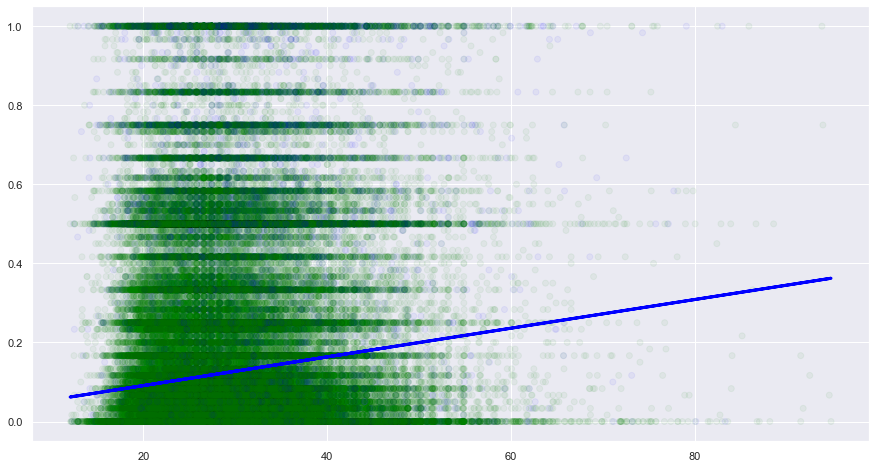

In [36]:
X3 = hd_df['BMI'].values
Y3 = hd_df['UnwellIndex'].values

X3 = X3.reshape(-1, 1)
Y3 = Y3.reshape(-1, 1)

reg3 = linear_model.LinearRegression()
reg3.fit(X3, Y3)

plt3 = plt.plot(X3, 
                reg3.predict(X3), 
                color='blue',
                linewidth=3)
plt3 = plt.scatter(X3,Y3, alpha=0.05, c = hd_df['HeartDisease'].map(colors))

R2 score for relationship. This new metric is negatively correlated to BMI.

In [37]:
from sklearn.metrics import r2_score

r2_score(X3,Y3)

-19.68398872743445

### Below we use a heatmap to see if there's a correlation between our float values and BMI

<AxesSubplot:>

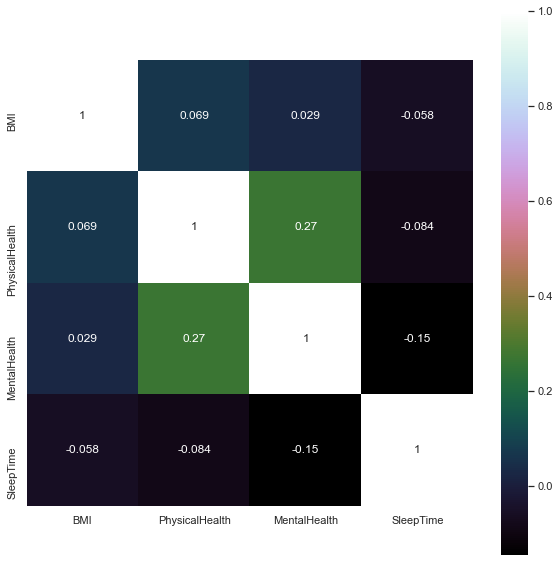

In [38]:
correlation = hd_df_trim.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

### Can we revise this data in order to see if categorical data correlates to Heart Disease?

In [39]:
hd_df_trim_enc = hd_df_trim.copy()

In [40]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

hd_df_trim_enc['HeartDisease'] = label_encoder.fit_transform(hd_df_trim_enc['HeartDisease'])
hd_df_trim_enc['Smoking'] = label_encoder.fit_transform(hd_df_trim_enc['Smoking'])
hd_df_trim_enc['AlcoholDrinking'] = label_encoder.fit_transform(hd_df_trim_enc['AlcoholDrinking'])
hd_df_trim_enc['Stroke'] = label_encoder.fit_transform(hd_df_trim_enc['Stroke'])
hd_df_trim_enc['DiffWalking'] = label_encoder.fit_transform(hd_df_trim_enc['DiffWalking'])
hd_df_trim_enc['Sex'] = label_encoder.fit_transform(hd_df_trim_enc['Sex'])
hd_df_trim_enc['AgeCategory'] = label_encoder.fit_transform(hd_df_trim_enc['AgeCategory'])
hd_df_trim_enc['Race'] = label_encoder.fit_transform(hd_df_trim_enc['Race'])
hd_df_trim_enc['Diabetic'] = label_encoder.fit_transform(hd_df_trim_enc['Diabetic'])
hd_df_trim_enc['PhysicalActivity'] = label_encoder.fit_transform(hd_df_trim_enc['PhysicalActivity'])
hd_df_trim_enc['GenHealth'] = label_encoder.fit_transform(hd_df_trim_enc['GenHealth'])
hd_df_trim_enc['Asthma'] = label_encoder.fit_transform(hd_df_trim_enc['Asthma'])
hd_df_trim_enc['KidneyDisease'] = label_encoder.fit_transform(hd_df_trim_enc['KidneyDisease'])
hd_df_trim_enc['SkinCancer'] = label_encoder.fit_transform(hd_df_trim_enc['SkinCancer'])

<AxesSubplot:>

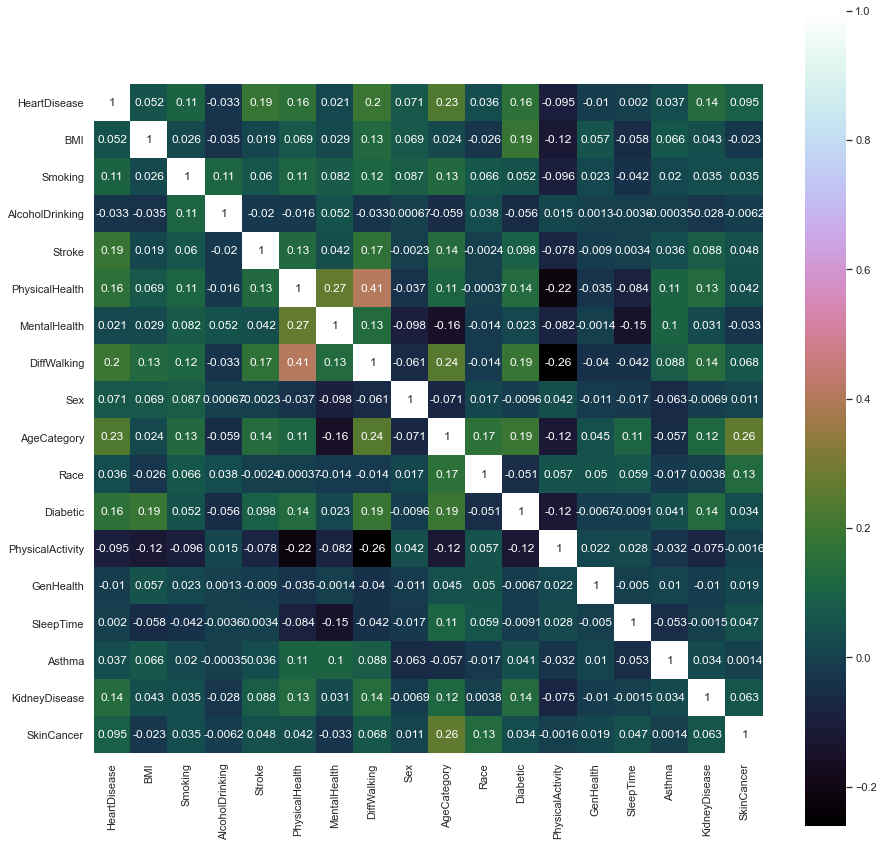

In [41]:
correlation = hd_df_trim_enc.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

# CONCLUSION:

After we encode the categorical data, we see that the best predictors of heart disease is Age, followed by whether or not the individual has difficult walking, and whether or not the individual has experienced a stroke. BMI has some correlation, as we saw in earlier analysis considering the percentages within each BMI category that has heart disease, but other factors may be more predictive. 

Another important thing to note is how important it is to work with a clean dataset. Our dataset in this case has more than 300k records, some of which represented significant outliers. The IQR method of outlier detection was employed rather than 3sigma, since it selected more outliers, reducing our variance by a greater degree. 

Some data should be evaluated using vizualization methods, rather than data tables. The Violin Plot utilized to see differences between races and sex for BMI provided a much clearer insight into the differences for each. In some cases, visualizing the data may be difficult when the values for a record are discrete-like variables. We see that when attempting to analyze the scatter blot for BMI and the Unwell Index. 